### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### load the dataset and check few rows

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Chek Null  values

In [4]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

### Handle null values
#### replace catogorical values with mode and numerical value with mean

In [5]:
for column in df.columns:
    if df[column].dtype == 'O':  # Categorical columns
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:  # Numerical columns
        df[column].fillna(df[column].mean(), inplace=True)

print("Missing values after handling:", df.isnull().sum())


Missing values after handling: area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64


C:\Users\Asus\AppData\Local\Temp\ipykernel_20760\1507620234.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_20760\1507620234.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

### Drop Unneccesary column like society, balcony, availability, area_type

In [6]:
df.drop(columns=['society','balcony','availability', 'area_type'] , inplace=True)

In [7]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

### create a new feature like BHK
#### This code extracts the first number from the "size" column and converts it to an integer

In [9]:
df['BHK'] = df['size'].str.split().str.get(0).astype(int)      

In [10]:
df.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


<Axes: ylabel='Frequency'>

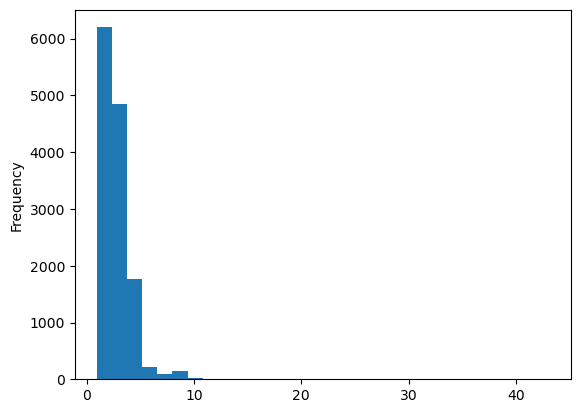

In [11]:
df['BHK'].plot(kind='hist',bins=30)

In [12]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
def range_converer(x):                                       
    N = x.split('-')
    if len(N) == 2:                                 #This function converts range values into a fix integer and their average or returns a float; errors return None.
        return (float(x[0])+float(x[1]))/2
    try:
        return float(x)
    except:
        return None

In [14]:
df['total_sqft'] = df['total_sqft'].apply(range_converer)

In [15]:
df.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


### Create  a new feature price per sqft 

In [16]:
df['price_per_sqft'] = (df['price']*100000)/df['total_sqft']

In [17]:
df.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [18]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [19]:
location_count = df['location'].value_counts()
location_count

location
Whitefield                        541
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

##### This code filters out locations that appear 5 times or fewer and stores them in location_count_less.

In [20]:
location_count_less = location_count[location_count <=5]
location_count_less

location
3rd Block Banashankari            5
VGP Layout                        5
Doddabanahalli                    5
Jakkuru Layout                    5
1st Stage Indira Nagar            5
                                 ..
Bapuji Layout                     1
1st Stage Radha Krishna Layout    1
BEML Layout 5th stage             1
singapura paradise                1
Abshot Layout                     1
Name: count, Length: 920, dtype: int64

##### This line of code replaces less frequent locations (those appearing 5 times or fewer) with 'other' in the df['location'] column.

In [21]:
df['location'] = df['location'].apply(lambda x: 'other' if x in location_count_less else x)

In [22]:
df['location'].value_counts()

location
other                        1816
Whitefield                    541
Sarjapur  Road                399
Electronic City               302
Kanakpura Road                273
                             ... 
Doddakannelli                   6
Shree Ananth Nagar Layout       6
Byrathi Village                 6
Rajiv Gandhi Nagar              6
Samethanahalli                  6
Name: count, Length: 386, dtype: int64

In [23]:
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1531.448708,2.692610,112.565627,2.802778,7.629203e+04
std,1243.564986,1.337777,148.971674,1.294496,8.111395e+05
min,0.500000,1.000000,8.000000,1.000000,2.678298e+02
25%,1096.000000,2.000000,50.000000,2.000000,4.284323e+03
50%,1265.000000,2.000000,72.000000,3.000000,5.497606e+03
75%,1660.000000,3.000000,120.000000,3.000000,7.486711e+03
max,52272.000000,40.000000,3600.000000,43.000000,3.180000e+07


In [24]:
df = df[(df['total_sqft']/df['BHK'])>=300]  #Filters out properties where per BHK space is below 300 sqft, ensuring reasonable apartment sizes.
df = df[df['BHK'] <= 5]                     # Keeps only properties where BHK ≤ 5, removing luxury or unrealistic listings with more than 5 BHKs.
df = df[df['bath'] <= 5]                    # Keeps only properties where bathrooms ≤ 5, removing listings with excessive bathrooms.

In [25]:
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,12034.000000,12034.000000,12034.000000,12034.000000,12034.000000
mean,1532.869485,2.465521,104.405309,2.569553,6227.897981
std,1110.464023,0.851121,128.601046,0.783795,4010.477759
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1111.000000,2.000000,48.950000,2.000000,4200.279518
50%,1290.000000,2.000000,69.000000,2.000000,5284.861974
75%,1658.250000,3.000000,110.000000,3.000000,6857.142857
max,52272.000000,5.000000,2912.000000,5.000000,176470.588235


In [26]:
df.shape

(12034, 7)

In [27]:
df.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [28]:
df = df[['location', 'total_sqft' , 'BHK' , 'bath' , 'price']]

In [29]:
lower_limit=df['price'].mean()-df['price'].std()*3
upper_limit=df['price'].mean()+df['price'].std()*3         #If price is greater than upper_limit, set it to upper_limit.
                                                           #If price is less than lower_limit, set it to lower_limit.
df['price']=np.where(df['price']>upper_limit,             # Otherwise, keep the original price.
                     upper_limit,                         
                     np.where(df['price']<lower_limit,lower_limit,df['price']))

In [30]:
df.head()

,location,total_sqft,BHK,bath,price
0,Electronic City Phase II,1056.0,2,2.0,39.07
1,Chikka Tirupathi,2600.0,4,5.0,120.00
2,Uttarahalli,1440.0,3,2.0,62.00
3,Lingadheeranahalli,1521.0,3,3.0,95.00
4,Kothanur,1200.0,2,2.0,51.00


In [31]:
df.describe()

,total_sqft,BHK,bath,price
count,12034.000000,12034.000000,12034.000000,12034.000000
mean,1532.869485,2.569553,2.465521,99.258803
std,1110.464023,0.783795,0.851121,89.084337
min,300.000000,1.000000,1.000000,8.440000
25%,1111.000000,2.000000,2.000000,48.950000
50%,1290.000000,2.000000,2.000000,69.000000
75%,1658.250000,3.000000,3.000000,110.000000
max,52272.000000,5.000000,5.000000,490.208446


In [32]:
df.head()

,location,total_sqft,BHK,bath,price
0,Electronic City Phase II,1056.0,2,2.0,39.07
1,Chikka Tirupathi,2600.0,4,5.0,120.00
2,Uttarahalli,1440.0,3,2.0,62.00
3,Lingadheeranahalli,1521.0,3,3.0,95.00
4,Kothanur,1200.0,2,2.0,51.00


 ### Detect and remove the outlair in bath column

<Axes: >

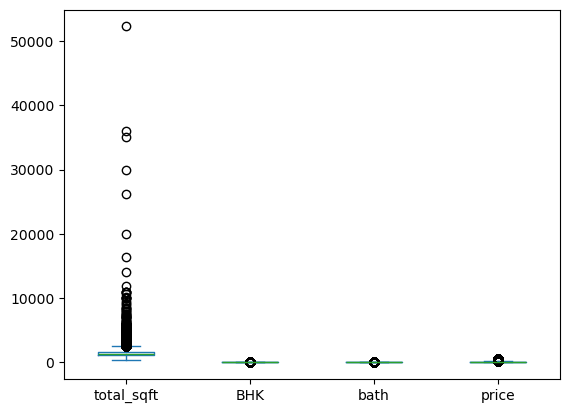

In [33]:
df.plot(kind='box')

In [34]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Specify the columns to remove outliers from
columns_to_remove_outliers = ['total_sqft', 'BHK', 'bath', 'price']

# Remove outliers
df_cleaned = remove_outliers_iqr(df, columns_to_remove_outliers)

# Display the shape of the cleaned DataFrame
print("Original shape:", df.shape)
print("New shape after outlier removal:", df_cleaned.shape)


Original shape: (12034, 5)
New shape after outlier removal: (10232, 5)


<Axes: >

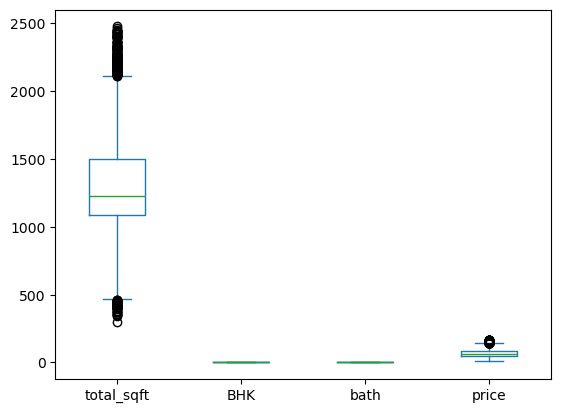

In [35]:
df_cleaned.plot(kind='box')

### Apply label encoder

In [36]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
for col in ['location','total_sqft','bath','BHK','price']:
  df[col] = le.fit_transform(df[col])     

df.head(10)

,location,total_sqft,BHK,bath,price
0,134,359,1,1,347
1,101,1456,3,5,1475
2,359,747,2,1,963
3,245,819,2,3,1403
4,235,504,1,1,701
5,377,474,1,1,312
6,288,1481,3,4,1556
7,303,1596,3,4,1723
8,258,617,2,3,988
10,377,1085,2,1,1116


### create a ColumnTransformer and apply one hot encoding and sStandardScaler on data

In [37]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['location']),
        ('scaler', StandardScaler(), ['location','total_sqft', 'BHK', 'bath'])
    ],
    remainder='passthrough'
)

In [38]:
df.head()

,location,total_sqft,BHK,bath,price
0,134,359,1,1,347
1,101,1456,3,5,1475
2,359,747,2,1,963
3,245,819,2,3,1403
4,235,504,1,1,701


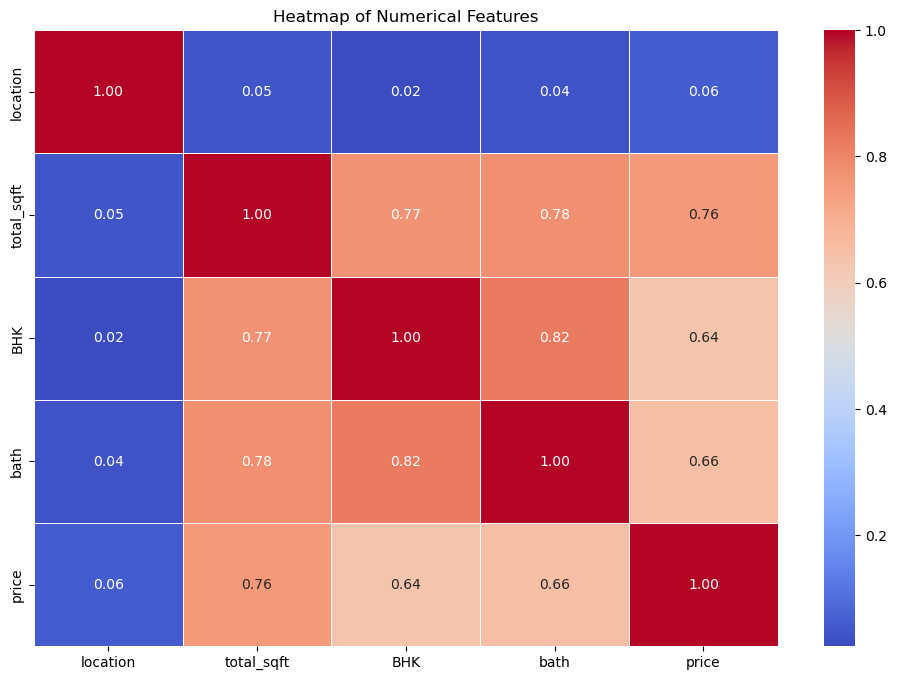

In [39]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Set title
plt.title("Heatmap of Numerical Features")

# Show the plot
plt.show()

#### separating the data and labels

In [40]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [41]:
print(X),print(y)

       location  total_sqft  BHK  bath
0           134         359    1     1
1           101        1456    3     5
2           359         747    2     1
3           245         819    2     3
4           235         504    1     1
...         ...         ...  ...   ...
13315       377        1619    4     4
13316       311        1644    3     5
13317       302         445    1     1
13318       291        1736    3     4
13319       126          46    0     0

[12034 rows x 4 columns]
0         347
1        1475
2         963
3        1403
4         701
         ... 
13315    1581
13316    1694
13317     921
13318    1722
13319      24
Name: price, Length: 12034, dtype: int64


(None, None)

### Train Test split

In [42]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

### Training  a model 

#### RandomForestRegressor

In [43]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

### Crete a pipeline and apply  model

In [44]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(ct , model)

In [45]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['location']),
                                                 ('scaler', StandardScaler(),
                                                  ['location', 'total_sqft',
                                                   'BHK', 'bath'])])),
                ('randomforestregressor', RandomForestRegressor())])

### fit X_train , y_train

In [46]:
pipe.fit(X_train , y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['location']),
                                                 ('scaler', StandardScaler(),
                                                  ['location', 'total_sqft',
                                                   'BHK', 'bath'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [47]:
from sklearn.metrics import r2_score
y_pred = pipe.predict(X_test)
print("R2 Score:" , r2_score(y_test ,y_pred))

R2 Score: 0.7414540145688571


In [48]:
df.head()

,location,total_sqft,BHK,bath,price
0,134,359,1,1,347
1,101,1456,3,5,1475
2,359,747,2,1,963
3,245,819,2,3,1403
4,235,504,1,1,701


In [49]:
# # Example input data
# new_data = pd.DataFrame({
#     'location': ['Kothanur'],
#     'total_sqft': [1056.0],
#     'BHK': [2],
#     'bath': [2.0]
# })

# # Make predictions
# predicted_price = model.predict(new_data)
# print(f"Predicted Price: {predicted_price[0]}")

#### LinearRegression

In [50]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [51]:
pipe1 = make_pipeline(ct ,linear_regression )
pipe1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['location']),
                                                 ('scaler', StandardScaler(),
                                                  ['location', 'total_sqft',
                                                   'BHK', 'bath'])])),
                ('linearregression', LinearRegression())])

In [52]:
pipe1.fit(X_train , y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['location']),
                                                 ('scaler', StandardScaler(),
                                                  ['location', 'total_sqft',
                                                   'BHK', 'bath'])])),
                ('linearregression', LinearRegression())])

In [53]:
y_pred = pipe1.predict(X_test)
print("R2 Score:" , r2_score(y_test ,y_pred))

R2 Score: 0.6769770123577286


#### DecisionTreeRegressor

In [54]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [55]:
pipe2 = make_pipeline(ct , decision_tree)
pipe2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['location']),
                                                 ('scaler', StandardScaler(),
                                                  ['location', 'total_sqft',
                                                   'BHK', 'bath'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [56]:
pipe2.fit(X_train , y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['location']),
                                                 ('scaler', StandardScaler(),
                                                  ['location', 'total_sqft',
                                                   'BHK', 'bath'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [57]:
y_pred = pipe2.predict(X_test)
print("R2 Score:" , r2_score(y_test ,y_pred))

R2 Score: 0.6527895544109474


###  Support vector regression

In [58]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [59]:
pipe3 = make_pipeline(ct ,svr)
pipe3

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['location']),
                                                 ('scaler', StandardScaler(),
                                                  ['location', 'total_sqft',
                                                   'BHK', 'bath'])])),
                ('svr', SVR())])

In [60]:
pipe3.fit(X_train , y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['location']),
                                                 ('scaler', StandardScaler(),
                                                  ['location', 'total_sqft',
                                                   'BHK', 'bath'])])),
                ('svr', SVR())])

In [61]:
y_pred = pipe3.predict(X_test)
print("R2 Score:" , r2_score(y_test ,y_pred))

R2 Score: 0.49359170761957194


### save the model

In [62]:
import pickle
pickle.dump(pipe , open('random_forest_house_price_model.pkl', 'wb'))
pickle.dump(df, open('dataset.pkl','wb'))